In [1]:
import openturns as ot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import factorial

from shapley import ShapleyIndices
from shapley.tests import ProductGaussian, AdditiveGaussian
from shapley.plots import set_style_paper, plot_error, plot_cover

%load_ext autoreload
%autoreload 2

%matplotlib inline

set_style_paper()

In [2]:
dim = 3
corr = 0.99

beta = None
Model = AdditiveGaussian

model = Model(dim=dim, beta=beta)
model.margins = [ot.Normal()]*(dim-1) + [ot.Normal(0, 2.)]
theta = [0., 0., corr]
model.copula_parameters = theta
    
true_results = {
    'Shapley': model.shapley_indices,
    'First Sobol': model.first_sobol_indices,
    'Total Sobol': model.total_sobol_indices
}

In [3]:
method = 'exact'
n_var = 10000
n_boot = 500
n_run = 100

name_axes = 'N_i'
all_n_axes = [3]
all_n_axes = np.asarray(all_n_axes)
n_n_axes = len(all_n_axes)

name_ticks = 'N_o'
n_n_ticks = 30
min_n_ticks = 108
max_n_ticks = 3000

assert name_axes != name_ticks, "Don't put the same parameters"

# For random case
name_fixed = 'N_o'
n_fixed = 1

if method == 'exact':
    n_perms = None
    assert (name_ticks != 'm') and (name_axes != 'm'), "We don't move the permutation number for the exact method"
else:
    assert (name_fixed != name_ticks) and (name_fixed != name_axes), "Don't put the same parameters for the fixed param"


all_n_ticks = np.logspace(np.log10(min_n_ticks), np.log10(max_n_ticks), n_n_ticks, base=10, dtype=int)
all_n_ticks = np.unique(all_n_ticks)
n_n_ticks = len(all_n_ticks)

if method == 'random':
    tmp = (min_n_ticks / (all_n_axes * n_fixed)).astype(int)
else:
    tmp = (min_n_ticks / (all_n_axes * factorial(dim))).astype(int)
    
print('Minimum values for {}: {}'.format(name_ticks, tmp))
assert (tmp > 0).all(), "Wrong minimum for min_n_ticks"


Minimum values for N_o: [6]


In [4]:
%%time
all_shapley_results = np.zeros((n_n_ticks, n_n_axes, n_run, dim, n_boot))
all_first_results = np.zeros((n_n_ticks, n_n_axes, n_run, dim, n_boot))
all_total_results = np.zeros((n_n_ticks, n_n_axes, n_run, dim, n_boot))

if method == 'random':
    all_shapley_results_SE = np.zeros((n_n_ticks, n_n_axes, n_run, dim))
    all_first_results_SE = np.zeros((n_n_ticks, n_n_axes, n_run, dim))
    all_total_results_SE = np.zeros((n_n_ticks, n_n_axes, n_run, dim))

for i_ticks, n_ticks in enumerate(all_n_ticks):
    for i_axes, n_axes in enumerate(all_n_axes):        
        print('n_ticks:', n_ticks, 'n_axes:', n_axes)
        if method == 'random':
            n = int(n_ticks / (n_axes * n_fixed))
        else:            
            n = int(n_ticks / (n_axes * factorial(dim)))
        
        if name_axes == 'N_i':
            n_inner = int(n_axes)
        elif name_axes == 'N_o':
            n_outer = int(n_axes)
        elif name_axes == 'm':
            n_perms = int(n_axes)
            
        if name_ticks == 'N_i':
            n_inner = n
        elif name_ticks == 'N_o':
            n_outer = n
        elif name_ticks == 'm':
            n_perms = n
            
        if method == 'random':
            if name_fixed == 'N_i':
                n_inner = n_fixed
            elif name_fixed == 'N_o':
                n_outer = n_fixed
            elif name_fixed == 'm':
                n_perms = n_fixed
            
        print('m = {}, No = {}, Ni = {}'.format(n_perms, n_outer, n_inner))        
            
        n_outer = int(n_outer)
        for i_run in range(n_run):            
            shapley = ShapleyIndices(model.input_distribution)
            shapley.build_sample(model=model, n_perms=n_perms, n_var=n_var, n_outer=n_outer, n_inner=n_inner)
            shapley_results = shapley.compute_indices(n_boot=n_boot)
            
            all_shapley_results[i_ticks, i_axes, i_run] = shapley_results.full_shapley_indices
            all_first_results[i_ticks, i_axes, i_run] = shapley_results.full_first_indices
            all_total_results[i_ticks, i_axes, i_run] = shapley_results.full_total_indices
            
            if method == 'random':
                all_shapley_results_SE[i_ticks, i_axes, i_run] = shapley_results.shapley_indices_SE
                all_first_results_SE[i_ticks, i_axes, i_run] = shapley_results.first_indices
                all_total_results_SE[i_ticks, i_axes, i_run] = shapley_results.total_indices_SE

n_ticks: 108 n_axes: 3
m = None, No = 6, Ni = 3
n_ticks: 121 n_axes: 3
m = None, No = 6, Ni = 3
n_ticks: 135 n_axes: 3
m = None, No = 7, Ni = 3
n_ticks: 152 n_axes: 3
m = None, No = 8, Ni = 3
n_ticks: 170 n_axes: 3
m = None, No = 9, Ni = 3
n_ticks: 191 n_axes: 3
m = None, No = 10, Ni = 3
n_ticks: 214 n_axes: 3
m = None, No = 11, Ni = 3
n_ticks: 240 n_axes: 3
m = None, No = 13, Ni = 3
n_ticks: 270 n_axes: 3
m = None, No = 15, Ni = 3
n_ticks: 303 n_axes: 3
m = None, No = 16, Ni = 3
n_ticks: 339 n_axes: 3
m = None, No = 18, Ni = 3
n_ticks: 381 n_axes: 3
m = None, No = 21, Ni = 3
n_ticks: 427 n_axes: 3
m = None, No = 23, Ni = 3
n_ticks: 479 n_axes: 3
m = None, No = 26, Ni = 3
n_ticks: 537 n_axes: 3
m = None, No = 29, Ni = 3
n_ticks: 602 n_axes: 3
m = None, No = 33, Ni = 3
n_ticks: 675 n_axes: 3
m = None, No = 37, Ni = 3
n_ticks: 758 n_axes: 3
m = None, No = 42, Ni = 3
n_ticks: 850 n_axes: 3
m = None, No = 47, Ni = 3
n_ticks: 953 n_axes: 3
m = None, No = 52, Ni = 3
n_ticks: 1069 n_axes: 3
m

1
(30, 100)
1
(30, 100)
1
(30, 100)


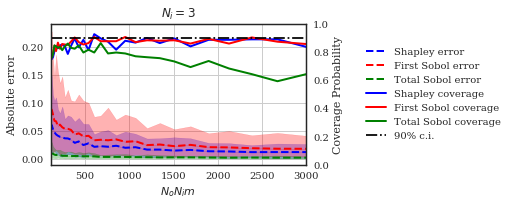

In [30]:
# Coverage probability
ci_prob = 0.10
error_type = 'absolute'
logscale = False
ci_method = 'bootstrap'
do_cover = True
savefigs = True

if n_boot == 1:
    if method == 'random':
        ci_method = 'lct'
    elif method == 'exact':
        do_cover = False

x_ticks = all_n_ticks
x_axes = all_n_axes
x_label = 'N_o N_i m'

n_col = n_n_axes
if n_col == 1:
    fig, axes = plt.subplots(1, n_col, figsize=(5, 3.), sharex=True, sharey=True) 
else:
    fig, axes = plt.subplots(1, n_col, figsize=(3.3*n_col, 3.), sharex=True, sharey=True) 
    
axes = [axes] if n_col == 1 else axes

for i_ax, (N, ax_err) in enumerate(zip(x_axes, axes)):
    
    # Chose the associated result
    results = {
        'Shapley': all_shapley_results[:, i_ax],
        'First Sobol': all_first_results[:, i_ax],
        'Total Sobol': all_total_results[:, i_ax]
    }
    
    if method == 'random':
        results_SE = {
            'Shapley': all_shapley_results_SE[:, i_ax],
            'First Sobol': all_first_results_SE[:, i_ax],
            'Total Sobol': all_total_results_SE[:, i_ax]
        }
    else:
        results_SE = None
            
    plot_error(results, true_results, x_ticks, ax=ax_err, error_type=error_type, logscale=logscale)

    ax_cov = ax_err.twinx()
    ax_cov.set_ylim(0., 1.)
    if do_cover:
        plot_cover(results, true_results, x_ticks, results_SE=results_SE, ax=ax_cov, ci_prob=ci_prob,
                  ci_method=ci_method)
        if i_ax < n_col - 1:
            plt.setp(ax_cov.get_yticklabels(), visible=False)
            ax_cov.set_ylabel('')
            ax_cov.set_yticks([])
            
    if i_ax > 0:
        plt.setp(ax_err.get_yticklabels(), visible=False)
        ax_err.set_ylabel('')
        
    ax_err.set_xlabel('$%s$' % (x_label))
    ax_err.grid()
    ax_err.set_title('$%s = %d$' % (name_axes, N))
    
    if i_ax == n_col-1:
        h_err, l_err = ax_err.get_legend_handles_labels()
        h_cov, l_cov = ax_cov.get_legend_handles_labels()
        ax_err.legend(h_err + h_cov, l_err + l_cov, loc='center left', 
                          bbox_to_anchor=(1.2, 0.5))

fig.tight_layout(pad=1.0)
if savefigs:
    figname = './output/%s_precision_dim_%d_%s_corr_%.2f' % (Model.__name__, dim, method, corr)
    figname += 'Nv_%d_Nboot_%d_Nrun_%d_ax_%s_tick_%s' % (n_var, n_boot, n_run, name_axes, name_ticks)
    figname += 'naxes_%d_nticks_%d_mintick_%d_maxtick_%d' % (n_n_axes, n_n_ticks, min_n_ticks, max_n_ticks)
    if method == 'random':
        figname += 'Fix_%s_nfixed_%d' % name_fixed, n_fixed
    figname += 'ciprob_%.2f_error_%s_%s' % (ci_prob, error_type, ci_method)
    fig.savefig(figname + '.pdf', bbox_inches='tight')
    fig.savefig(figname + '.png', bbox_inches='tight')

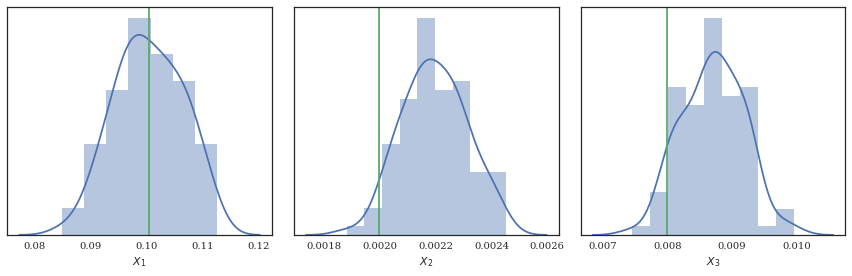

In [56]:
name = 'Total Sobol'

fig, axes = plt.subplots(1, dim, figsize=(12, 4))

for i in range(dim):
    ax = axes[i]
    estimation = results[name][-1, :, i, 0]
    true_result = true_results[name][i]
    error = abs(estimation - true_result) / true_result
    sns.distplot(estimation, ax=ax)
    ax.plot([true_result]*2, ax.get_ylim())
    ax.set_yticks([])
    ax.set_xlabel('$X_%d$' % (i+1))
    
fig.tight_layout()